In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(1080, 1920, 3)


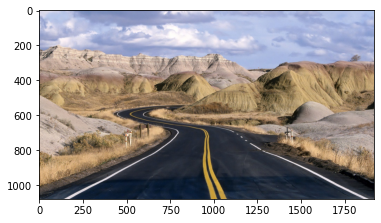

In [2]:
frame = cv2.cvtColor(cv2.imread('../data/input_image_road.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(frame)
print(frame.shape)

(500, 500, 3)


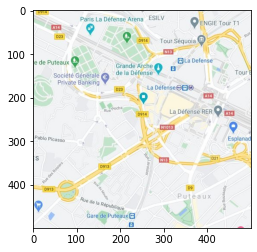

In [3]:
map_image = cv2.cvtColor(cv2.imread('../data/map.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(map_image)
print(map_image.shape)

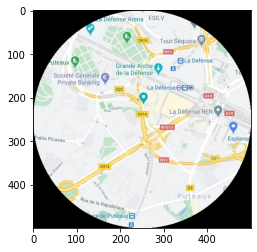

In [4]:
map_image = cv2.cvtColor(cv2.imread('../data/map.jpg'), cv2.COLOR_BGR2RGB)
mask = np.zeros(map_image.shape[:2], dtype="uint8")
cv2.circle(mask, (int(map_image.shape[0]/2), int(map_image.shape[1]/2)), int(map_image.shape[0]/2), 255, -1)
masked = cv2.bitwise_and(map_image, map_image, mask=mask)
plt.imshow(masked)

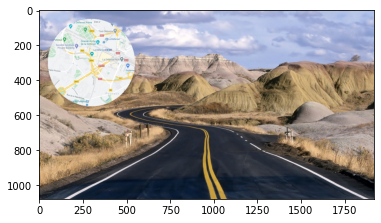

In [39]:
x_offset=y_offset=50

map_image = cv2.cvtColor(cv2.imread('../data/map.jpg'), cv2.COLOR_BGR2RGB)
frame = cv2.cvtColor(cv2.imread('../data/input_image_road.jpg'), cv2.COLOR_BGR2RGB)
mask = np.zeros(frame.shape[:2], dtype="uint8")
cv2.circle(mask, (int(map_image.shape[0]/2) + y_offset, int(map_image.shape[1]/2) + x_offset), int(map_image.shape[0]/2), 255, -1)

mask_inv = cv2.bitwise_not(mask)


frame_masked = cv2.bitwise_and(frame,frame,mask = mask_inv)
frame[y_offset:y_offset + map_image.shape[0],x_offset:x_offset + map_image.shape[1]] = map_image
map_masked = cv2.bitwise_and(frame,frame,mask = mask)

rows,cols,channels = frame.shape
dst = cv2.add(frame_masked,map_masked)
frame[0:rows, 0:cols ] = dst


plt.imshow(dst)

530 1030
1370 1870


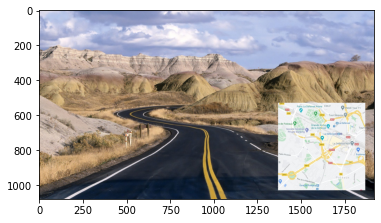

In [27]:
map_image = cv2.cvtColor(cv2.imread('../data/map.jpg'), cv2.COLOR_BGR2RGB)
frame = cv2.cvtColor(cv2.imread('../data/input_image_road.jpg'), cv2.COLOR_BGR2RGB)

x_offset=y_offset=50

print(frame.shape[0] - map_image.shape[0] - y_offset, frame.shape[0] - y_offset)
print(frame.shape[1] - map_image.shape[1] - x_offset, frame.shape[1] - x_offset)

frame[frame.shape[0] - map_image.shape[0] - y_offset : frame.shape[0] - y_offset,
      frame.shape[1] - map_image.shape[1] - x_offset : frame.shape[1] - x_offset] = map_image

plt.imshow(frame)